<a href="https://colab.research.google.com/github/alvredo5/struktur_data/blob/main/Praktikum8_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jarak titik dari Sumber
0 		 0
1 		 4
2 		 12
3 		 19
4 		 21
5 		 11
6 		 9
7 		 8
8 		 14


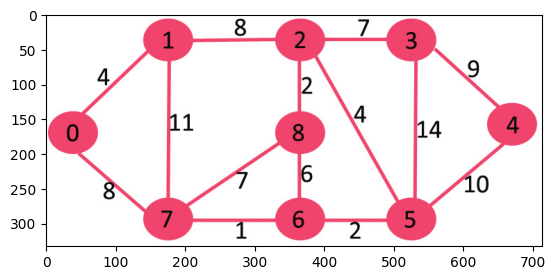

In [ ]:
import heapq  # Mengimpor modul heapq (heap queue)

import matplotlib.pyplot as plt

img = plt.imread('dijkstra_short.jpeg')

class Graph:
    def __init__(self, v):
        self.v = v  # Menginisialisasi jumlah vertex (simpul)
        self.adj = [[] for _ in range(v)]  # Membuat daftar kosong untuk setiap vertex

    def addEdge(self, u, v, w):
        self.adj[u].append((v, w))  # Menambahkan vertex tujuan dan bobot edge ke daftar adjacency u
        self.adj[v].append((u, w))  # Menambahkan vertex asal dan bobot edge ke daftar adjacency v

    def shortestPath(self, src):
        pq = [(0, src)]  # Membuat priority queue untuk menyimpan vertex yang sedang diproses

        dist = [float('inf')] * self.v  # Membuat daftar untuk jarak dan menginisialisasi semua jarak sebagai tak terhingga (INF)
        dist[src] = 0  # Jarak dari source ke source adalah 0

        while pq:  # Melakukan looping sampai semua jarak terpendek terfinalisasi
            d, u = heapq.heappop(pq)  # Mengambil vertex dengan jarak terpendek dari priority queue

            if d > dist[u]:  # Memeriksa apakah vertex sudah diproses sebelumnya
                continue

            for v, weight in self.adj[u]:  # Iterasi melalui semua vertex terhubung 'u'
                if dist[v] > dist[u] + weight:  # Jika terdapat jalur yang lebih pendek ke 'v' melalui 'u'
                    dist[v] = dist[u] + weight  # Memperbarui jarak ke 'v'
                    heapq.heappush(pq, (dist[v], v))  # Menambahkan vertex 'v' ke priority queue dengan jarak terbaru

        print("Jarak titik dari Sumber")
        for i in range(self.v):  # Mencetak jarak terpendek yang disimpan dalam dist[]
            print(f"{i} \t\t {dist[i]}")

plt.imshow(img)

if __name__ == "__main__":
    v = 9  # Jumlah vertex dalam graf
    g = Graph(v)

    # Membuat graf sesuai dengan edge dan bobot yang diberikan
    g.addEdge(0, 1, 4)
    g.addEdge(0, 7, 8)
    g.addEdge(1, 2, 8)
    g.addEdge(1, 7, 11)
    g.addEdge(2, 3, 7)
    g.addEdge(2, 8, 2)
    g.addEdge(2, 5, 4)
    g.addEdge(3, 4, 9)
    g.addEdge(3, 5, 14)
    g.addEdge(4, 5, 10)
    g.addEdge(5, 6, 2)
    g.addEdge(6, 7, 1)
    g.addEdge(6, 8, 6)
    g.addEdge(7, 8, 7)


    g.shortestPath(0)  # Memanggil fungsi shortestPath untuk mencari jarak terpendek dari source vertex (0)




Masukan awal: 7
Masukkan Akhir: 3
['7', '8', '2', '3']


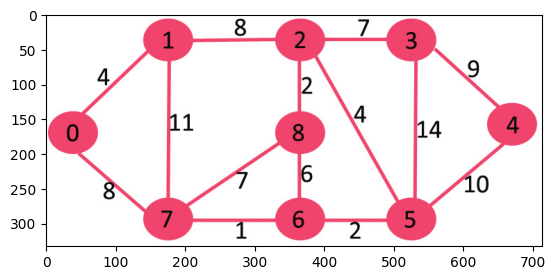

In [ ]:
import matplotlib.pyplot as plt
img = plt.imread('dijkstra_short.jpeg')

peta = {'0':set(['1','7']),
        '1':set(['0','7','2']),
        '2':set(['1','8','5','3']),
        '3':set(['2','5','4']),
        '4':set(['3','5']),
        '5':set(['2','3','4','6']),
        '6':set(['5','7','8']),
        '7':set(['6','8','0']),
        '8':set(['2','6','7'])}

def bfs_lintasan_terpendek(graph, mulai, goal):
  # mengecek semua node
  explored = []
  # mengecek semua jalur
  queue = [[mulai]]

  # kembali ke jalur apabila awal adalah tujuan
  if mulai == goal:
    return "Awal adalah Tujuan"

  # perulangan sampai dengan semua jalur telah diperiksa
  while queue:
    # masukkan antrian paling depan ke variable jalur
    jalur = queue.pop(0)
    # ambil node terakhir jalur
    node = jalur[-1]
    # jika nude utidak sama dengan tujuan, maka cek apakah node tidak ada di explored
    if node not in explored:
      neighbours = graph[node] # Memasukkan semua isi neighbout dari graph node
      # buat jalur baru dan
      # masukkan ke dalam queue
      for neighbours in neighbours: # cek semua neighbot dari graph node
        jalur_baru = list(jalur) #Memasukkan isi dari variable jalur ke variable jalur baru
        jalur_baru.append(neighbours) #update/tambah isi dari jalur baru dengan neighbout
        queue.append(jalur_baru) #update /tambah isi dari queue dengan jalur baru
        #cek neighbout apakah sama dengan tujuan, jika ya maka return jalur baru
        if neighbours == goal:
          return jalur_baru # kembali ke jalur baru apabila neighbour benar

      explored.append(node) # update/tambah isi dari explored dengan node

  #dalam kasus ini tidak ada node yang di inputkan
  return "Mohon maaf node kalian pilih tidak ada"

awal = input("Masukan awal: ")
tujuan = input("Masukkan Akhir: ")

plt.imshow(img)
print(bfs_lintasan_terpendek(peta, awal, tujuan)) # contoh kasus dari C dan L